In [1]:
import numpy as np, healpy as hp, pickle, prjlib, curvedsky, plottools as pl
from matplotlib.pyplot import *

In [2]:
def view_map(alm,nside,lmax,min=-.1,max=.1):
    Map = curvedsky.utils.hp_alm2map(nside,lmax,lmax,alm[:lmax+1,:lmax+1])
    hp.mollview(Map,min=min,max=max)

In [91]:
Lmax, lmax = 4096, 2048
l = np.linspace(0,lmax,lmax+1)
L = np.linspace(0,Lmax,Lmax+1)
plac = prjlib.analysis_init(t='la',freq='com',fltr='none',ntype='base_roll50')
plaw = prjlib.analysis_init(t='la',freq='com',fltr='cinv',ntype='base_roll50')
pid = prjlib.analysis_init(t='id',ntype='cv')
pco = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype='base_roll50')
Plaw = prjlib.analysis_init(t='la',freq='com',fltr='cinv',ntype='goal_roll50')
Plac = prjlib.analysis_init(t='la',freq='com',fltr='none',ntype='goal_roll50')
Pco = prjlib.analysis_init(t='co',freq='com',fltr='cinv',ntype='goal_roll50')
vmin, vmax = -3e-6, 3e-6

In [4]:
# load windows
Msa, __ = prjlib.window('sa',ascale=0.)
Mla, wnla = prjlib.window('la',ascale=0.,nside=psa.nside)
mco = np.average(Mla)+np.average(Msa)-np.average(Mla*Msa)
print(wnla[0],mco)

/global/homes/t/toshiyan/.local/lib/python3.7/site-packages/healpy/fitsfunc.py:369: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


0.2917563120524089 0.39795013765494036


In [173]:
Ealm = pickle.load(open(pid.fcmb.alms['o']['E'][1],"rb"))[:pid.lmax+1,:pid.lmax+1]
Balm = pickle.load(open(pid.fcmb.alms['o']['B'][1],"rb"))[:pid.lmax+1,:pid.lmax+1]
Ealm2 = pickle.load(open(pid.fcmb.alms['o']['E'][2],"rb"))[:pid.lmax+1,:pid.lmax+1]
Balm2 = pickle.load(open(pid.fcmb.alms['o']['B'][2],"rb"))[:pid.lmax+1,:pid.lmax+1]

Filtered maps

In [6]:
#cEalm = pickle.load(open(pco.fcmb.alms['o']['E'][1],"rb"))[:lmax+1,:lmax+1]
#cBalm = pickle.load(open(pco.fcmb.alms['o']['B'][1],"rb"))[:lmax+1,:lmax+1]
#view_map(cEalm,psa.nside,lmax,min=vmin,max=vmax)

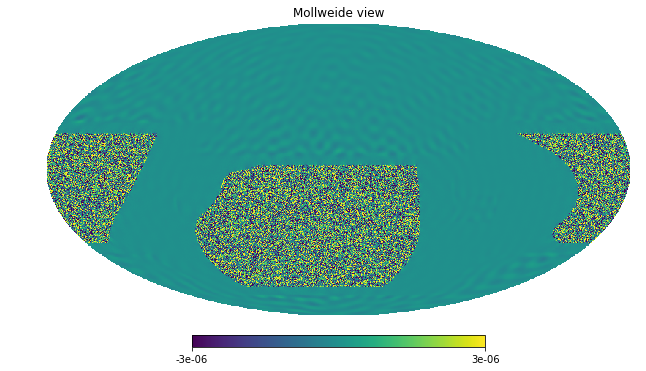

In [195]:
Elaw = pickle.load(open(plaw.fcmb.alms['o']['E'][1],"rb"))[:plaw.lmax+1,:plaw.lmax+1]
Blaw = pickle.load(open(plaw.fcmb.alms['o']['B'][1],"rb"))[:plaw.lmax+1,:plaw.lmax+1]
view_map(Elaw,psa.nside,lmax,min=vmin,max=vmax)

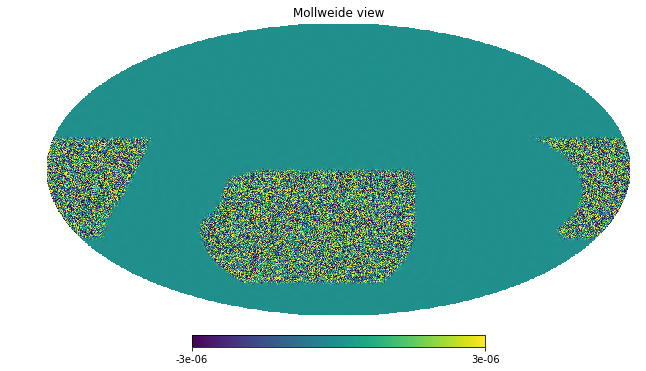

In [8]:
Elac = pickle.load(open(plac.fcmb.alms['o']['E'][1],"rb"))[:plaw.lmax+1,:plaw.lmax+1]
Blac = pickle.load(open(plac.fcmb.alms['o']['B'][1],"rb"))[:plaw.lmax+1,:plaw.lmax+1]
view_map(Elac,psa.nside,lmax,min=vmin,max=vmax)

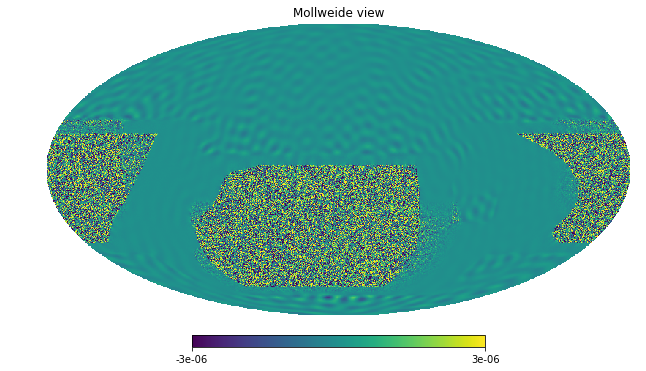

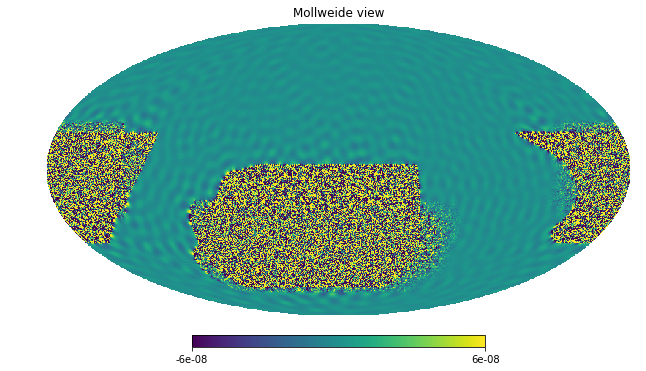

In [282]:
eco = pickle.load(open(pco.fcmb.alms['o']['E'][2],"rb"))[:pco.lmax+1,:pco.lmax+1]
bco = pickle.load(open(pco.fcmb.alms['o']['B'][2],"rb"))[:pco.lmax+1,:pco.lmax+1]
view_map(eco,512,pco.lmax,min=vmin,max=vmax)
view_map(bco,512,pco.lmax,min=vmin*0.02,max=vmax*0.02)

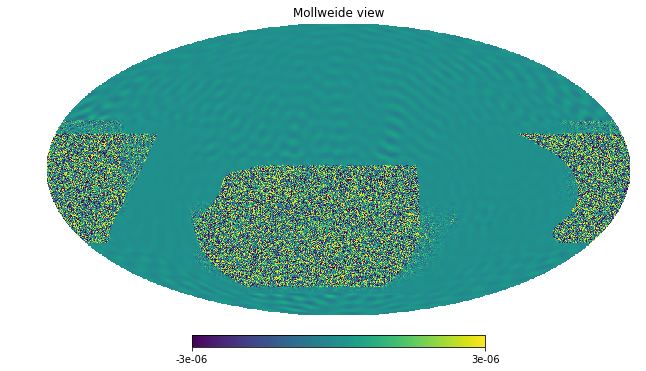

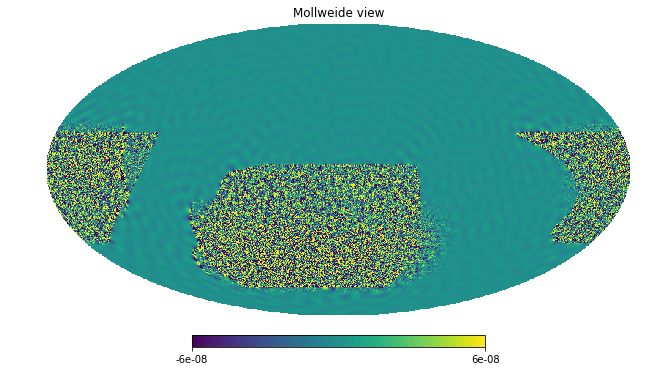

In [345]:
Eco = pickle.load(open(Pco.fcmb.alms['o']['E'][1],"rb"))[:pco.lmax+1,:pco.lmax+1]
Bco = pickle.load(open(Pco.fcmb.alms['o']['B'][1],"rb"))[:pco.lmax+1,:pco.lmax+1]
view_map(Eco,512,pco.lmax,min=vmin,max=vmax)
view_map(Bco,512,pco.lmax,min=vmin*0.02,max=vmax*0.02)

In [29]:
#eco = pickle.load(open(pco.fcmb.alms['o']['E'][1].replace('_roll50',''),"rb"))[:pco.lmax+1,:pco.lmax+1]
#bco = pickle.load(open(pco.fcmb.alms['o']['B'][1].replace('_roll50',''),"rb"))[:pco.lmax+1,:pco.lmax+1]
#view_map(eco,psa.nside,pco.lmax,min=vmin,max=vmax)

Power spectrum

In [31]:
TT, EE, BB = np.loadtxt(plac.fcmb.scl['o'],unpack=True,usecols=(1,2,3))[:,:plac.lmax+1]
TN, EN, BN = np.loadtxt(plac.fcmb.scl['n'],unpack=True,usecols=(1,2,3))[:,:plac.lmax+1]
TT -= TN
EE -= EN
BB -= BN
WT = TT/(TT+TN+1e-30)
WE = EE/(EE+EN+1e-30)
WB = BB/(BB+BN+1e-30)

In [346]:
wEE = curvedsky.utils.alm2cl(pco.lmax,Elaw[:pco.lmax+1,:pco.lmax+1])
wBB = curvedsky.utils.alm2cl(pco.lmax,Blaw[:pco.lmax+1,:pco.lmax+1])
cEE = curvedsky.utils.alm2cl(pco.lmax,Eco)
cBB = curvedsky.utils.alm2cl(pco.lmax,Bco)
cee = curvedsky.utils.alm2cl(pco.lmax,eco)
cbb = curvedsky.utils.alm2cl(pco.lmax,bco)
iEE = curvedsky.utils.alm2cl(pco.lmax,Ealm[:pco.lmax+1,:pco.lmax+1])
iBB = curvedsky.utils.alm2cl(pco.lmax,Balm[:pco.lmax+1,:pco.lmax+1])
xEE = curvedsky.utils.alm2cl(pco.lmax,Eco,Ealm[:pco.lmax+1,:pco.lmax+1])
xBB = curvedsky.utils.alm2cl(pco.lmax,Bco,Balm[:pco.lmax+1,:pco.lmax+1])
xwE = curvedsky.utils.alm2cl(pco.lmax,Elaw[:pco.lmax+1,:pco.lmax+1],Ealm[:pco.lmax+1,:pco.lmax+1])
xwB = curvedsky.utils.alm2cl(pco.lmax,Blaw[:pco.lmax+1,:pco.lmax+1],Balm[:pco.lmax+1,:pco.lmax+1])
xeE = curvedsky.utils.alm2cl(pco.lmax,eco,Ealm2[:pco.lmax+1,:pco.lmax+1])
xbB = curvedsky.utils.alm2cl(pco.lmax,bco,Balm2[:pco.lmax+1,:pco.lmax+1])
#__, wEE, wBB = np.loadtxt(plaw.fcmb.scl['o'],unpack=True,usecols=(1,2,3))[:,:plaw.lmax+1]
__, WEE, WBB = np.loadtxt(plac.fcmb.scl['o'],unpack=True,usecols=(1,2,3))[:,:plac.lmax+1]
#__, xEE, xBB = np.loadtxt(plaw.fcmb.scl['x'],unpack=True,usecols=(1,2,3))[:,:plaw.lmax+1]

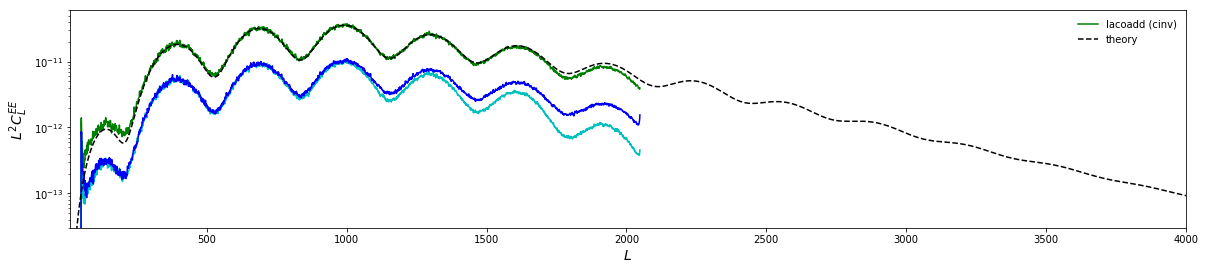

In [347]:
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=4000,ymin=3e-14,ymax=6e-11,ylog=True,ylab=r'$L^2C_L^{EE}$')
#plot(L,L**2*WEE,color='r',label='lacoadd')
plot(l,l**2*wEE/wnla[0],color='g',label='lacoadd (cinv)')
#plot(L,L**2*xEE,color='k',label='lacoadd (cinv) x input')
#plot(L,L**2*WE*EE,color='m',label='diag wiener theory')
plot(l,cEE*l**2,color='c')
plot(l,cee*l**2,color='b')
plot(L,L**2*plaw.lEE,color='k',label='theory',ls='--')
legend()

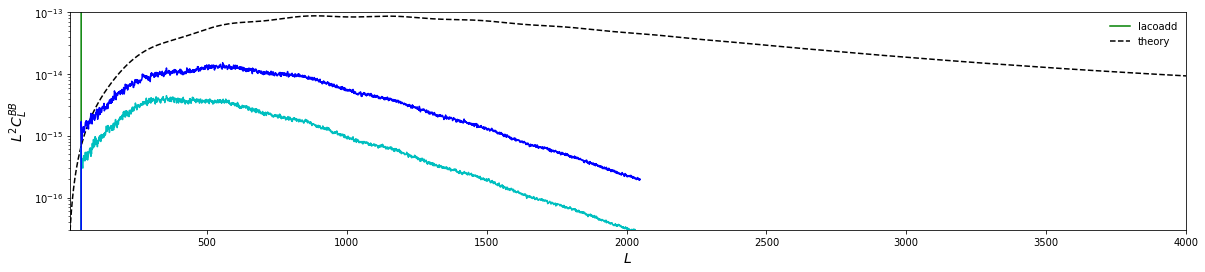

In [348]:
pl.plot_1dstyle(fsize=[20,4],xmin=10,xmax=4000,ymin=3e-17,ymax=1e-13,ylog=True,ylab=r'$L^2C_L^{BB}$')
#plot(l,l**2*cBB,color='r',label='cocoadd')
plot(L,L**2*WBB,color='g',label='lacoadd')
#plot(L,L**2*xBB,color='k',label='lacoadd (cinv) x input')
plot(L,L**2*plac.lBB,'k--',label='theory')
#plot(L,L**2*WB*BB,color='m',label='diag wiener theory')
plot(l,cBB*l**2,color='c')
plot(l,cbb*l**2,color='b')
legend()

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


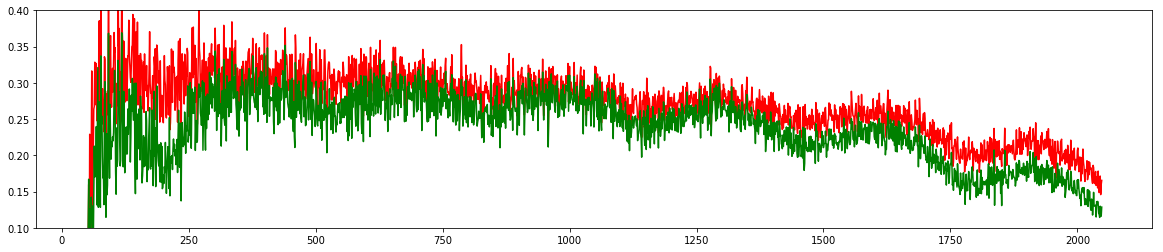

In [349]:
ylim(.1,.4)
plot(l,xEE**2/cEE/iEE,color='r')
#plot(l,xeE**2/cee/iEE,color='b')
plot(l,xwE**2/wEE/iEE,color='g')

/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/global/homes/t/toshiyan/.conda/envs/loc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


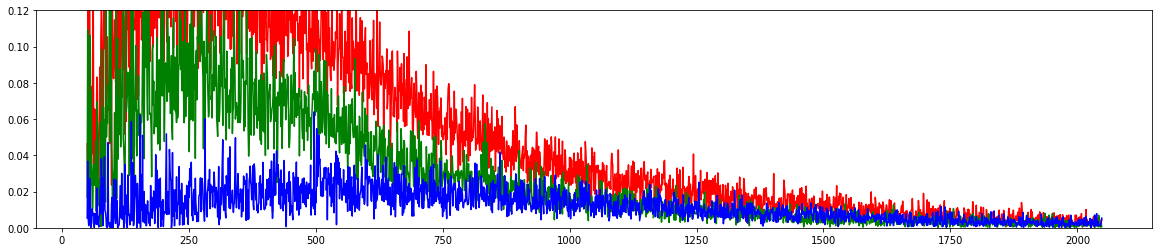

In [350]:
ylim(.0,.12)
plot(l,xBB**2/cBB/iBB,color='r')
plot(l,xbB**2/cbb/iBB,color='g')
plot(l,xwB**2/wBB/iBB,color='b')